In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch_scatter import scatter_add
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from datasets import *

In [ ]:
def node_labels_distr(dataset, dataset_name):
    X = None
    for graph in dataset.dataset.get_data():
        node_labels = graph.x.numpy().argmax(axis=1)
        X = np.concatenate((X, node_labels)) if X is not None else node_labels
    sns.distplot(X, kde=False)
    
    title = f"{dataset_name} nodes distribution"
    plt.title(title)

In [ ]:
def class_distr(dataset, dataset_name):
    Y = None
    for graph in dataset.dataset.get_data():
        size = graph.y.numpy()
        Y = np.concatenate((Y, size)) if Y is not None else size
    sns.distplot(Y, kde=False)
    
    no_classes = Y.max() + 1
    
    ax = sns.distplot(Y, kde=False)
    ax.set(xticks=list(range(1,no_classes+1)))    
    title = f"{dataset_name} class distribution"
    plt.title(title)

In [ ]:
def size_distr(dataset, dataset_name, print_dgcnn_k=False):
    X = None
    no_graphs = len(dataset.dataset.get_data())
    for graph in dataset.dataset.get_data():
        size = np.array([graph.x.shape[0]])
        X = np.concatenate((X, size)) if X is not None else size
    sns.distplot(X, kde=False)
    
    if print_dgcnn_k:
        sorted_size = np.sort(X)
        # Use to determine the degree k st. 60% of the nodes fall into that range
        for k in [0.6, 0.9]:  # for DGCNN
            k_graphs = int(no_graphs*k)
            print(f'k needed for {k*100}% on dataset {dataset_name} is {sorted_size[k_graphs]}')
    
    title = f"{dataset_name} sizes distribution"
    plt.title(title)

In [ ]:
def degree_distr(dataset, dataset_name):
    X = None
    no_graphs = len(dataset.dataset.get_data())
    for graph in dataset.dataset.get_data():
        x = graph.x
        edge_index = graph.edge_index
        
        # TODO THIS MUST BE DOUBLE CHECKED WHEN WORKING ON DIRECTED GRAPHS (FOR THE FUTURE)
        row, col = edge_index
        edge_weight = torch.ones(edge_index.size(1))
        deg = scatter_add(edge_weight, row, dim=0, dim_size=x.size(0))

        X = np.concatenate((X, deg)) if X is not None else deg
        
    sns.distplot(X, kde=False)
        
    title = f"{dataset_name} degree distribution"
    plt.title(title)

In [4]:
def plot_statistics(dataset):
    plt.figure()
    node_labels_distr(dataset, dataset.name)
    plt.figure()
    class_distr(dataset, dataset.name)
    plt.figure()
    size_distr(dataset, dataset.name)
    plt.figure()
    degree_distr(dataset, dataset.name)

In [5]:
for dataset in [NCI1(), Proteins(), DD(), Enzymes(), Ppi()]:
    plot_statistics(dataset)

NameError: name 'NCI1' is not defined

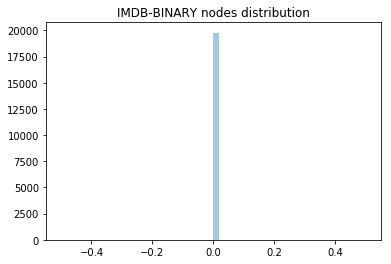

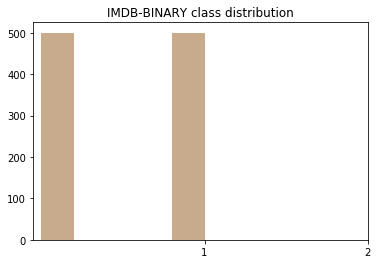

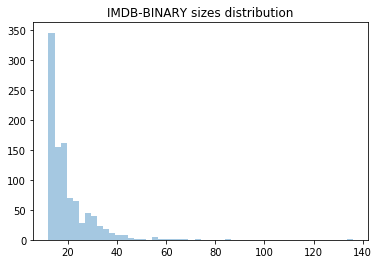

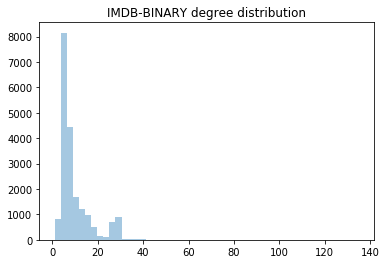

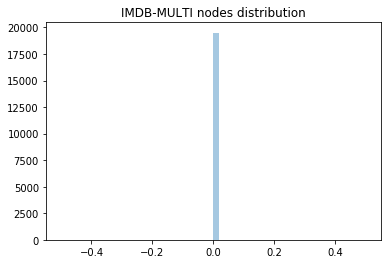

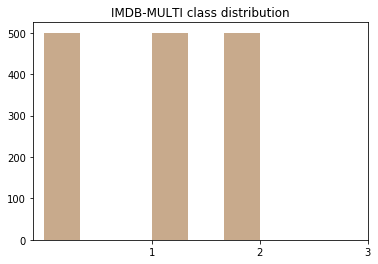

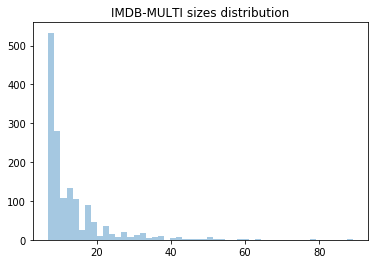

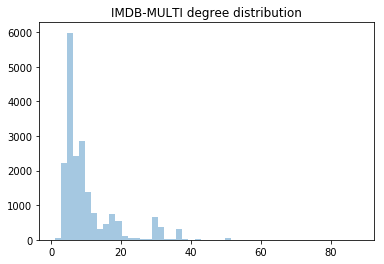

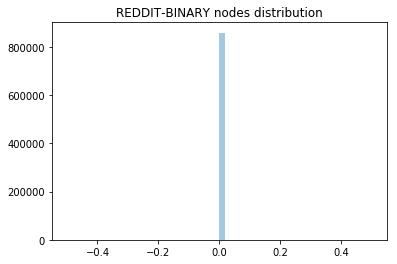

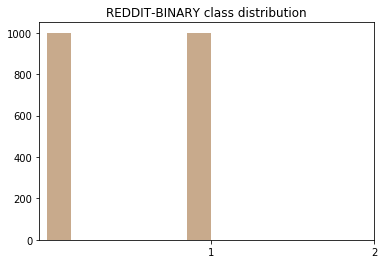

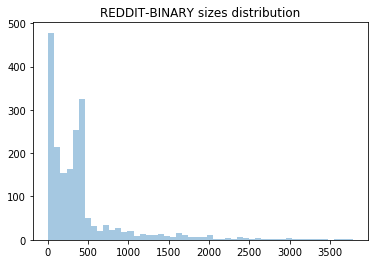

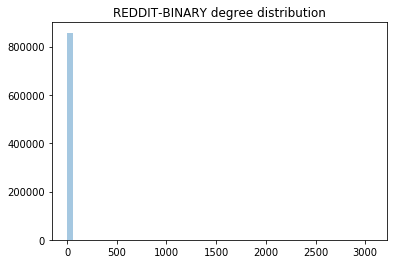

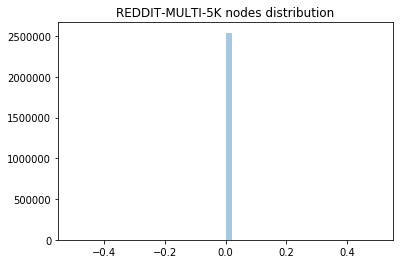

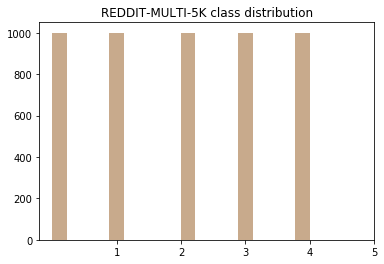

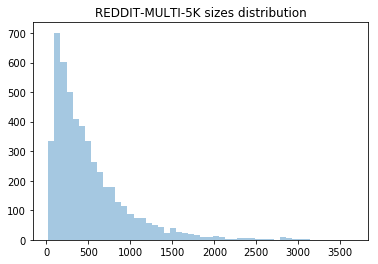

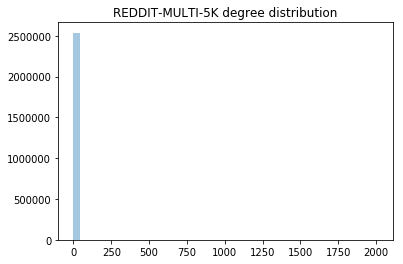

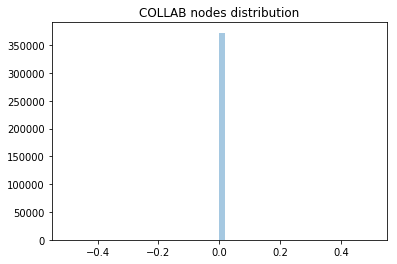

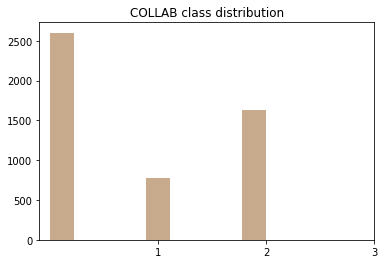

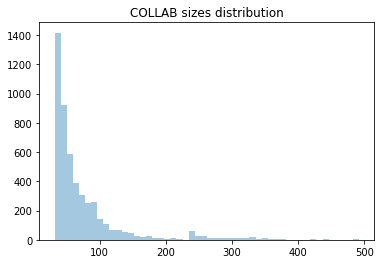

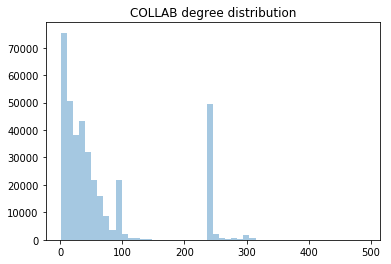

In [8]:
for dataset in [IMDBBinary(), IMDBMulti(), RedditBinary(), Reddit5K(), Collab()]:
    plot_statistics(dataset)